In [ ]:
# Lab05_2024

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
#from mlxtend.evaluate import bias_variance_decomp
from sklearn import clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso, LassoLarsIC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import check_random_state, shuffle

import warnings

warnings.filterwarnings('ignore')

In [ ]:
def generateDataset(
        xRange,
        fun=lambda x: x,
        shuffleDataset=True,
        randomState=None,
        mean=0,
        stdev=4,
):
    rs = check_random_state(randomState)
    X = np.arange(*xRange, dtype=float)
    y = np.array([fun(x) for x in X], dtype=float)
    y += rs.normal(mean, stdev, y.shape)
    X = X.reshape((-1, 1))
    if shuffleDataset:
        X, y = shuffle(X, y, random_state=randomState)
    return X, y

In [ ]:
def plotTrDev(
        trX,
        trY,
        valX,
        valY,
):
    plt.scatter(trX, trY, label='Training Set')
    plt.scatter(valX, valY, label='Validation Set')

In [ ]:
def plotCurve(xRange, est):
    xSpace = np.linspace(*xRange)
    ySpace = est.predict(xSpace.reshape((-1, 1)))
    plt.plot(xSpace, ySpace, label=f'Pred Line')

In [ ]:
def f(X):
    return 3 * X + 1

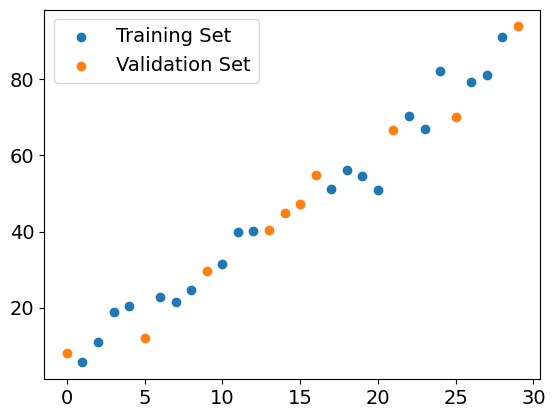

In [ ]:
plt.rcParams.update({'font.size': 14})

xMin = 0
xMax = 30
xRange = (xMin, xMax)
rs = 0
X, y = generateDataset(
    xRange=xRange,
    fun=f,
    randomState=rs,
)
trX, valX, trY, valY = train_test_split(
    X, y,
    test_size=0.33,
    random_state=rs
)
plotTrDev(trX, trY, valX, valY)
plt.legend()
plt.show()

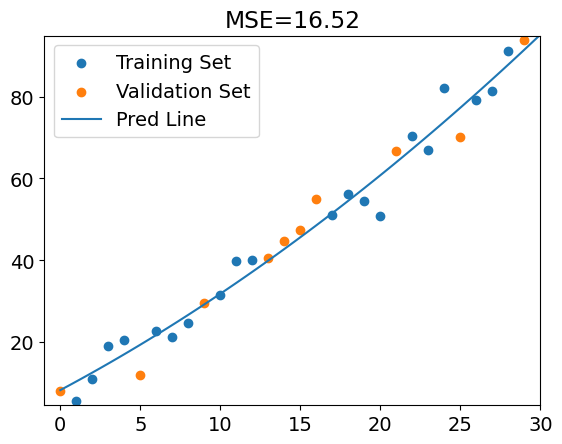

In [ ]:
degree = 2
alpha = 1

model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('regression', Ridge(alpha=alpha)),
])
model.fit(trX, trY)
predY = model.predict(valX)
mse = mean_squared_error(valY, predY)
plt.figure()
plotTrDev(trX, trY, valX, valY)
plotCurve(xRange, model)
plt.title(f'MSE={mse:.2f}')
plt.legend()
plt.xlim([X.min() - 1, X.max() + 1])
plt.ylim([y.min() - 1, y.max() + 1])
plt.show()

alpha=0.1; degree=1 15.95090587878588 15.952908501772077 2.1081889219215157
alpha=0.1; degree=2 16.045207927081197 16.31317255759489 3.790430630007057
alpha=0.1; degree=5 26.888546424147155 28.779266065472264 227.5334209931718
alpha=0.1; degree=10 410.27878659768794 49096.37650003257 361448.2918050834
alpha=1; degree=1 15.63402350675329 15.656562735561787 1.9160251465195128
alpha=1; degree=2 14.85241756510651 14.879682438207421 3.186203511906357
alpha=1; degree=5 25.821680587184034 31.422712570331008 174.89451426670385
alpha=1; degree=10 410.27878659768794 49127.25313595773 361126.0207362539
alpha=10; degree=1 16.161747370572726 16.23618487888835 1.4492536056098422
alpha=10; degree=2 16.140123302241467 16.36551620859839 3.061660515111671
alpha=10; degree=5 26.606590151697617 26.839119000649816 92.49010979210212
alpha=10; degree=10 410.27878659768794 49085.23541862718 361342.379701028
alpha=100; degree=1 19.140294014746075 19.24119604812633 1.267596821206114
alpha=100; degree=2 20.47099

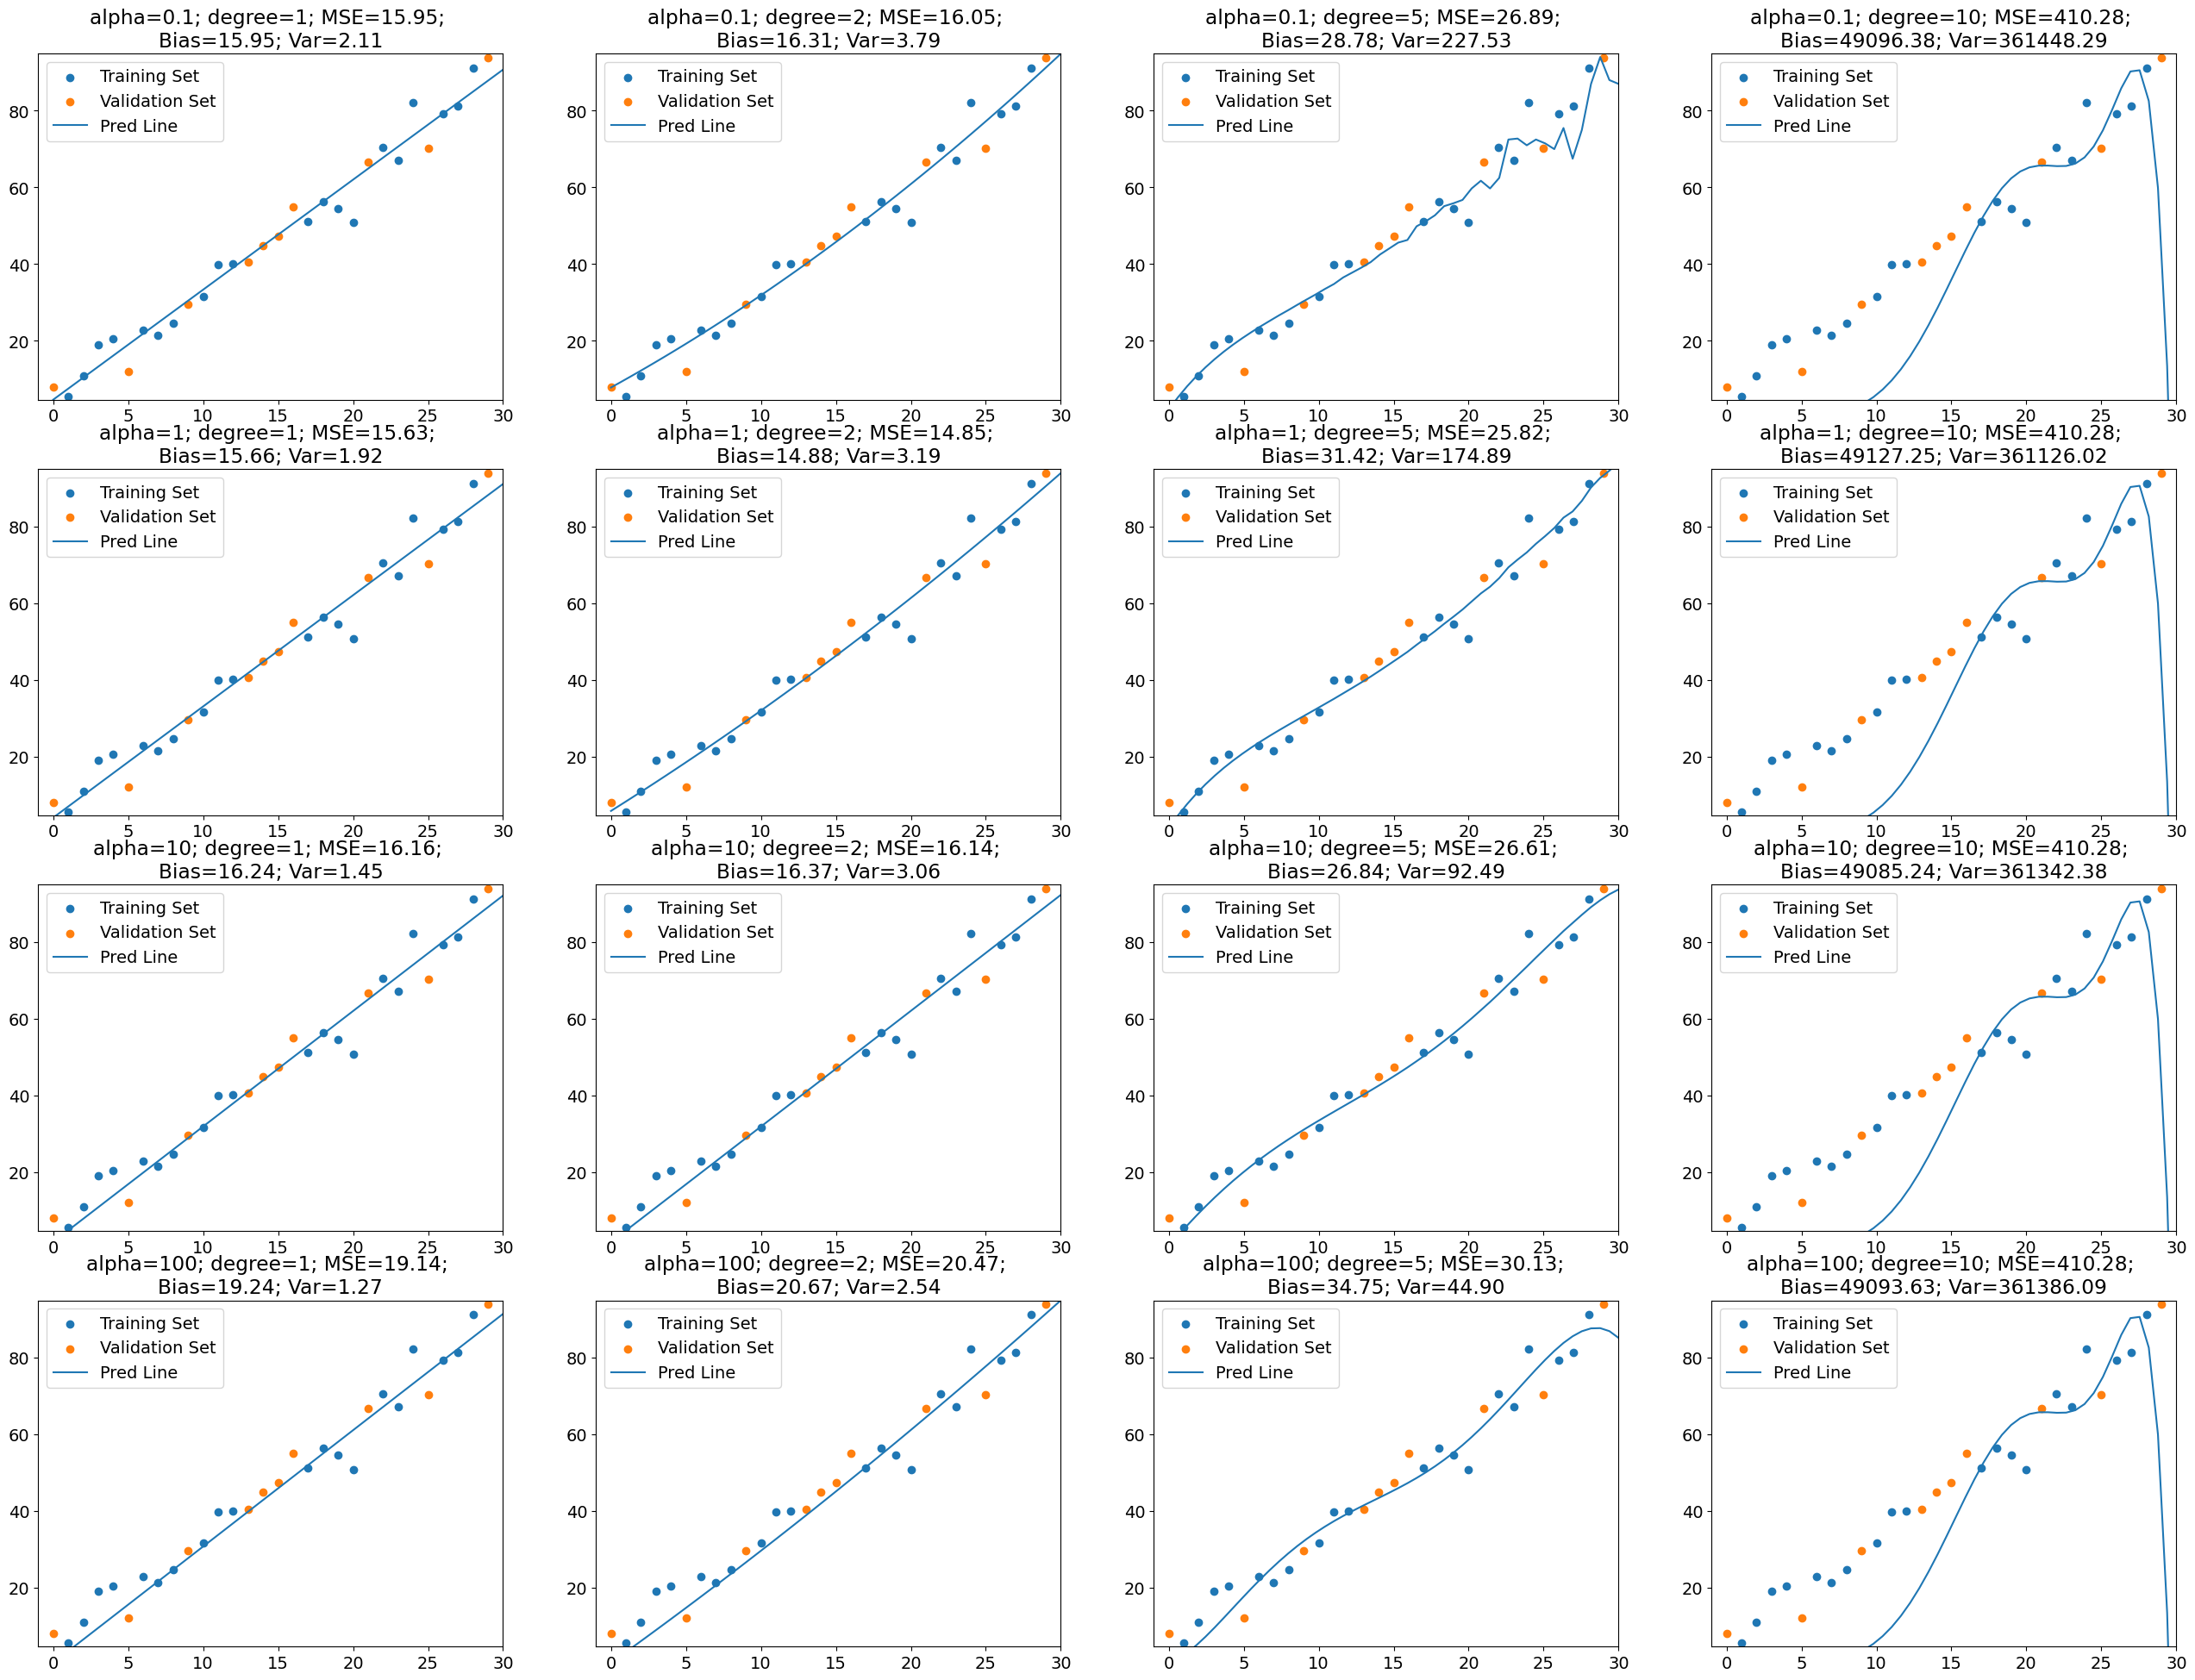

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

plt.figure(figsize=[6.4 * 5, 4.8 * 5])

hyperParams = {
    'alpha': [0.1, 1, 10, 100],
    'degree': [1, 2, 5, 10],
}
paramGrid = ParameterGrid(hyperParams)

estimator = KernelRidge(kernel='polynomial')
for index, param in enumerate(paramGrid):
    plt.subplot(4, 4, index + 1)
    tmpEst = clone(estimator)
    tmpEst.set_params(**param)
    tmpEst.fit(trX, trY)
    predY = tmpEst.predict(valX)
    mse = mean_squared_error(valY, predY)
    paramStr = '; '.join([f'{k}={v}' for k, v in param.items()])
    _, bias, var = bias_variance_decomp(
        clone(tmpEst),
        trX,
        trY,
        valX,
        valY,
        'mse',
        random_seed=rs,
    )

    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, tmpEst)
    plt.title(f'{paramStr}; MSE={mse:.2f}; \n'
              f'Bias={bias:.2f}; Var={var:.2f}')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    # plt.savefig(f'Results/{paramStr}.png')
    # plt.show()
    print(paramStr, mse, bias, var)
#plt.savefig(f'Results/Overall.png')
plt.show()

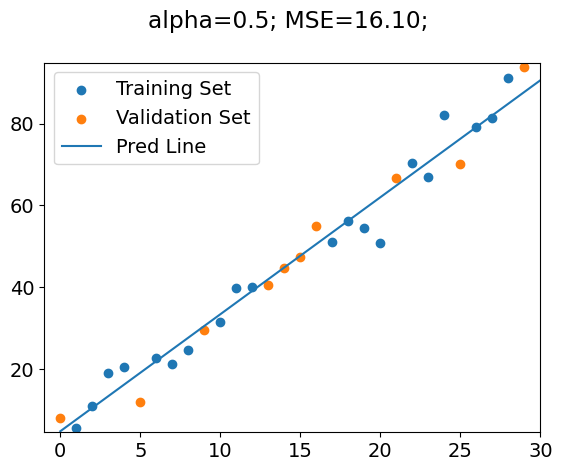

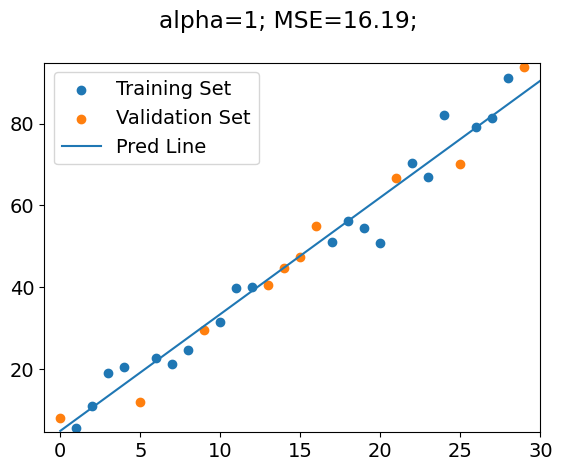

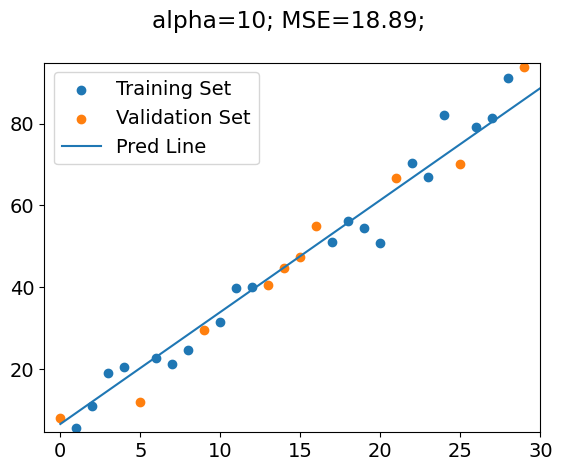

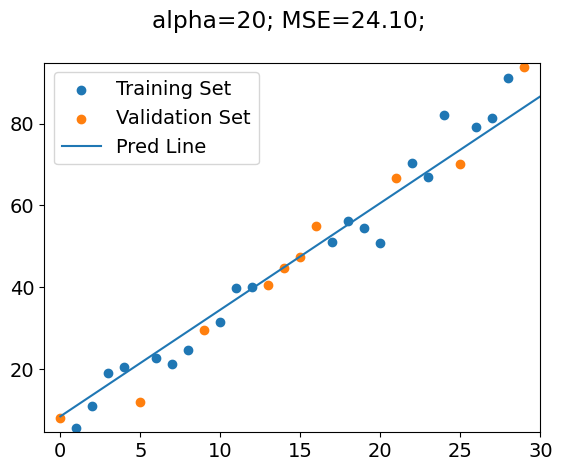

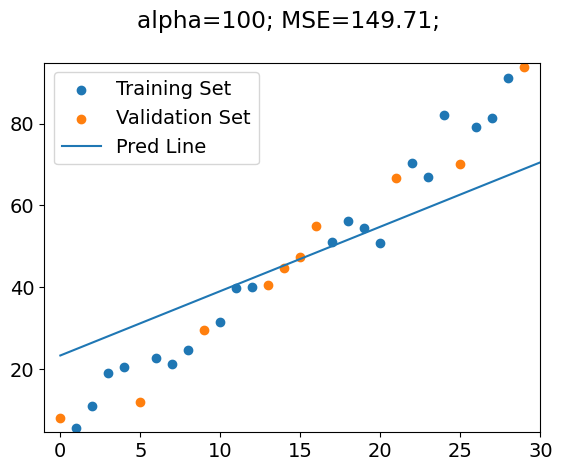

In [ ]:
for alpha in [0.5, 1, 10, 20, 100]:
    model = Lasso(alpha).fit(trX, trY)
    predY = model.predict(valX)
    mse = mean_squared_error(valY, predY)
    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, model)
    plt.title(f'alpha={alpha}; MSE={mse:.2f}; \n')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    #plt.savefig(f'Results/{alpha}.png')
    plt.show()

This code snippet demonstrates how to use the LassoLarsIC model with two different information criteria (AIC and BIC) to automatically select the best regularization parameter (alpha) for Lasso regression. Here’s a breakdown of what each part of the code does:

Explanation of the Code
Looping through Information Criteria

python
Copy code
for ic in ['aic', 'bic']:
This loop iterates over two different information criteria: AIC (Akaike Information Criterion) and BIC (Bayes Information Criterion). Each iteration will fit a model using one of these criteria.
Creating the LassoLarsIC Model

python
Copy code
model = LassoLarsIC(ic)
In each iteration, a new LassoLarsIC model is created using the current information criterion (ic), which will determine how the model selects the regularization parameter (alpha) during fitting.
Fitting the Model

python
Copy code
model.fit(trX, trY)
The model is trained on the training data (trX for features and trY for the target variable). During this step, the model will automatically determine the best alpha value based on the selected information criterion.
Making Predictions

python
Copy code
predY = model.predict(valX)
After fitting the model, predictions are made on the validation dataset (valX). This generates predicted values (predY) that can be compared to the actual target values.
Calculating Mean Squared Error (MSE)

python
Copy code
mse = mean_squared_error(valY, predY)
The Mean Squared Error (MSE) is calculated to evaluate the model's performance on the validation set. This metric quantifies the average squared difference between the predicted values and the actual values (valY).
Plotting Training and Validation Data

python
Copy code
plotTrDev(trX, trY, valX, valY)
This function likely visualizes the training data (trX, trY) and validation data (valX, valY) to provide a visual representation of how the model fits the data.
Plotting the Regression Curve

python
Copy code
plotCurve(xRange, model)
This function plots the regression curve based on the fitted model. It visualizes the relationship between the features and the target variable.
Setting the Plot Title

python
Copy code
plt.title(f'IC={ic}; MSE={mse:.2f}; Alpha={model.alpha_}\n')
The title of the plot is set to show the current information criterion (ic), the calculated MSE, and the selected alpha value (model.alpha_). This provides context for the model's performance and configuration.
Adding Legend and Setting Axis Limits

python
Copy code
plt.legend()
plt.xlim([X.min() - 1, X.max() + 1])
plt.ylim([y.min() - 1, y.max() + 1])
A legend is added to the plot for better interpretation. The X-axis and Y-axis limits are set based on the minimum and maximum values of the features and target variables, with a slight buffer of 1 unit on each side.
Displaying the Plot

python
Copy code
plt.show()
Finally, the plot is displayed. This visualizes how well the model fits the data and the relationship between the features and target variable for the given information criterion.
Summary
The code iterates over two information criteria (AIC and BIC) to fit LassoLarsIC models.
It calculates predictions and evaluates the model's performance using MSE.
The results are visualized to show the relationship between the model, the data, and the chosen regularization parameter (alpha).
By comparing the results across AIC and BIC, you can observe how each criterion influences the model selection and performance.

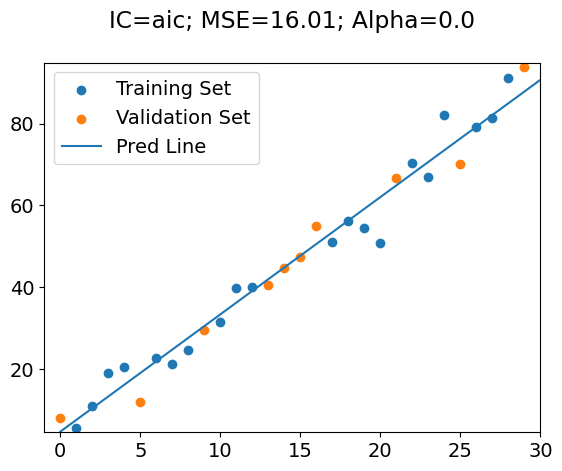

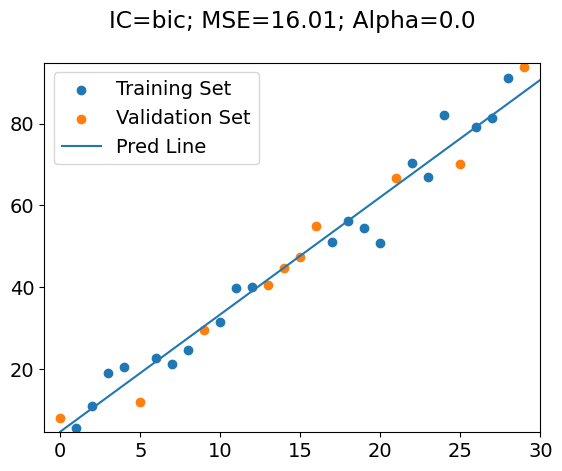

In [ ]:
for ic in ['aic', 'bic']:
    model = LassoLarsIC(ic)
    model.fit(trX, trY)
    predY = model.predict(valX)
    mse = mean_squared_error(valY, predY)
    plotTrDev(trX, trY, valX, valY)
    plotCurve(xRange, model)
    plt.title(f'IC={ic}; MSE={mse:.2f}; Alpha={model.alpha_}\n')
    plt.legend()
    plt.xlim([X.min() - 1, X.max() + 1])
    plt.ylim([y.min() - 1, y.max() + 1])
    #plt.savefig(f'Results/{ic}.png')
    plt.show()

This code snippet illustrates how to use LassoLarsIC by generating synthetic data and plotting it. Let's break down each part step by step:

#Explanation of the Code

Importing Libraries

python
Copy code
import numpy as np
import matplotlib.pyplot as plt
numpy is imported as np for numerical operations, particularly for creating arrays and generating random numbers.
matplotlib.pyplot is imported as plt for plotting graphs.
Setting a Seed for Reproducibility

python
Copy code
np.random.seed(42)  # for reproducibility
This line sets the random seed to 42, ensuring that the random numbers generated are the same each time the code is run. This is useful for reproducibility in experiments.
Generating the Data

python
Copy code
x = np.linspace(0, 10, 100)
np.linspace(0, 10, 100) creates an array of 100 evenly spaced values between 0 and 10. This array represents the independent variable (features) x.
Adding Noise

python
Copy code
noise = np.random.normal(0, 1, len(x))
np.random.normal(0, 1, len(x)) generates random noise from a normal distribution with a mean of 0 and a standard deviation of 1. The length of the noise array matches the number of x values generated earlier.
Creating the Dependent Variable

python
Copy code
y = 2 * x + 5 + 2 * np.sin(x) + 2 * np.cos(x) + noise
The dependent variable y is calculated based on a linear function of x with some added sinusoidal variations and noise:
The linear part is 2 * x + 5, which is a straight line with a slope of 2 and a y-intercept of 5.
2 * np.sin(x) and 2 * np.cos(x) add periodic variations to the data, making the relationship between x and y more complex.
The noise term adds randomness to the data to simulate real-world variability.
Plotting the Data

python
Copy code
plt.scatter(x, y, label='Data Points')
This line creates a scatter plot of the generated data points (x, y). Each point represents a combination of the independent variable x and the dependent variable y.
Setting Labels for Axes

python
Copy code
plt.xlabel('x')
plt.ylabel('y')
These lines set the labels for the x-axis and y-axis, indicating what each axis represents.
Adding a Legend

python
Copy code
plt.legend()
This line adds a legend to the plot. It helps identify the data points if there are multiple datasets plotted.
Displaying the Plot

python
Copy code
plt.show()
Finally, this command displays the plot on the screen. The plot shows how the dependent variable y changes with respect to the independent variable x, incorporating linear and sinusoidal components as well as random noise.
#Summary
This code snippet generates synthetic data that follows a linear trend with sinusoidal variations and random noise. The resulting plot helps visualize the relationship between x and y, providing a basis for applying LassoLarsIC or other regression techniques to model the underlying pattern in the data. By using this example, you can later fit LassoLarsIC to identify the best regularization parameter and evaluate its performance.

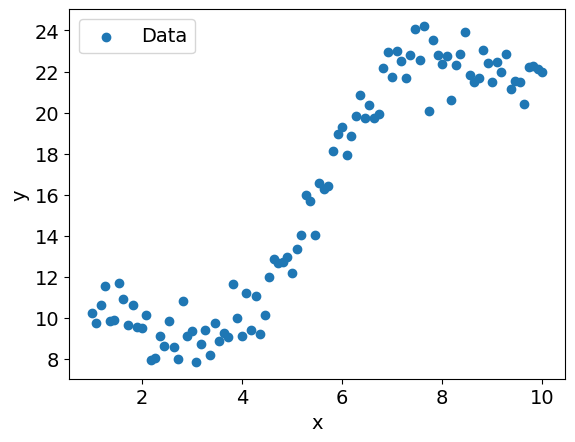

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)  # for reproducibility
x = np.linspace(1, 10, 100)
noise = np.random.normal(0, 1, size=len(x))
y = 2*x + 5 + 2*np.sin(x) + 2*np.cos(x) + noise

# Plot the data
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Next code snippet demonstrates how to use the statsmodels library to fit three different regression models to the generated data (y) and evaluate their performance using the Akaike Information Criterion (AIC). Let's break down the code step by step.

#Explanation of the Code
Importing the Statsmodels Library

python
Copy code
import statsmodels.api as sm
The statsmodels library is imported as sm. This library provides classes and functions for estimating and testing statistical models.
Model 1: Only Linear Term

python
Copy code
X1 = sm.add_constant(x)
model1 = sm.OLS(y, X1)
results1 = model1.fit()
aic1 = results1.aic
Adding a Constant:
X1 = sm.add_constant(x) adds a constant term (intercept) to the independent variable x. This is important for linear regression, as it allows the model to fit a line that does not necessarily go through the origin.
Creating the OLS Model:
model1 = sm.OLS(y, X1) creates an Ordinary Least Squares (OLS) regression model using y as the dependent variable and X1 (which includes the constant and the linear term) as the independent variable.
Fitting the Model:
results1 = model1.fit() fits the OLS model to the data and stores the results.
Extracting AIC:
aic1 = results1.aic retrieves the AIC value from the fitted model results. This value will be used to evaluate the model's performance and complexity.
Model 2: Linear and Sine Terms

python
Copy code
X2 = sm.add_constant(np.column_stack((x, np.sin(x))))
model2 = sm.OLS(y, X2)
results2 = model2.fit()
aic2 = results2.aic
Creating the Feature Matrix:
X2 = sm.add_constant(np.column_stack((x, np.sin(x)))) creates a new feature matrix that includes the constant term, the linear term (x), and the sine of x.
np.column_stack() stacks the arrays as columns to form a 2D array.
Fitting the OLS Model:
Similar to Model 1, an OLS model is created and fitted to the dependent variable y, with the new feature matrix X2.
Extracting AIC:
aic2 = results2.aic retrieves the AIC value for Model 2.
Model 3: Linear, Sine, and Cosine Terms

python
Copy code
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x))))
model3 = sm.OLS(y, X3)
results3 = model3.fit()
aic3 = results3.aic
Creating the Feature Matrix:
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x)))) constructs a feature matrix that includes the constant term, the linear term (x), the sine of x, and the cosine of x.
Fitting the OLS Model:
The OLS model is created and fitted using the new feature matrix X3.
Extracting AIC:
aic3 = results3.aic retrieves the AIC value for Model 3.
Printing AIC Values

python
Copy code
print(f"Model 1 AIC: {aic1}")
print(f"Model 2 AIC: {aic2}")
print(f"Model 3 AIC: {aic3}")
These lines print the AIC values for each model to the console. The AIC values allow you to compare the models based on their goodness of fit and complexity:
A lower AIC indicates a better model that balances fit and complexity.
#Summary
This code snippet demonstrates how to fit three different regression models using statsmodels:

Model 1 uses only a linear term.
Model 2 includes both linear and sine terms.
Model 3 incorporates linear, sine, and cosine terms.
The AIC values for each model are calculated and printed, allowing for a comparison of their performance. The model with the lowest AIC is preferred as it suggests a better trade-off between goodness of fit and model complexity.

In [ ]:
import statsmodels.api as sm

# Model 1: Only linear term
X1 = sm.add_constant(x)
model1 = sm.OLS(y, X1)
results1 = model1.fit()
aic1 = results1.aic

# Model 2: Linear and sine terms
X2 = sm.add_constant(np.column_stack((x, np.sin(x))))
model2 = sm.OLS(y, X2)
results2 = model2.fit()
aic2 = results2.aic

# Model 3: Linear, sine, and cosine terms
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x))))
model3 = sm.OLS(y, X3)
results3 = model3.fit()
aic3 = results3.aic

# Print AIC values
print(f"Model 1 AIC: {aic1}")
print(f"Model 2 AIC: {aic2}")
print(f"Model 3 AIC: {aic3}")


Model 1 AIC: 455.77628665699444
Model 2 AIC: 402.9500969054924
Model 3 AIC: 267.29243575975937


This code snippet demonstrates the use of the statsmodels library in Python to fit different regression models to a dataset and evaluate their performance using the Akaike Information Criterion (AIC). AIC is a measure of the relative quality of statistical models for a given dataset, with lower values indicating better models. Let's break down the code step by step and then analyze the output values provided.

Explanation of the Code
Importing the Statsmodels Library

python
Copy code
import statsmodels.api as sm
The statsmodels library is imported as sm to facilitate statistical modeling.
Model 1: Only Linear Term

python
Copy code
X1 = sm.add_constant(x)
model1 = sm.OLS(y, X1)
results1 = model1.fit()
aic1 = results1.aic
Adding a Constant:
X1 = sm.add_constant(x) adds a constant term (intercept) to the independent variable x.
Creating the OLS Model:
model1 = sm.OLS(y, X1) creates an Ordinary Least Squares (OLS) regression model using y as the dependent variable and X1 as the independent variable.
Fitting the Model:
results1 = model1.fit() fits the model to the data and stores the results.
Extracting AIC:
aic1 = results1.aic retrieves the AIC value for Model 1.
Model 2: Linear and Sine Terms

python
Copy code
X2 = sm.add_constant(np.column_stack((x, np.sin(x))))
model2 = sm.OLS(y, X2)
results2 = model2.fit()
aic2 = results2.aic
Creating the Feature Matrix:
X2 = sm.add_constant(np.column_stack((x, np.sin(x)))) creates a feature matrix that includes the constant term, the linear term (x), and the sine of x.
Fitting the OLS Model:
Similar to Model 1, an OLS model is created and fitted using the new feature matrix X2.
Extracting AIC:
aic2 = results2.aic retrieves the AIC value for Model 2.
Model 3: Linear, Sine, and Cosine Terms

python
Copy code
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x))))
model3 = sm.OLS(y, X3)
results3 = model3.fit()
aic3 = results3.aic
Creating the Feature Matrix:
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x)))) constructs a feature matrix that includes the constant term, the linear term (x), the sine of x, and the cosine of x.
Fitting the OLS Model:
The OLS model is created and fitted using the new feature matrix X3.
Extracting AIC:
aic3 = results3.aic retrieves the AIC value for Model 3.
Printing AIC Values

python
Copy code
print(f"Model 1 AIC: {aic1}")
print(f"Model 2 AIC: {aic2}")
print(f"Model 3 AIC: {aic3}")
These lines print the AIC values for each model to the console.
Output Values and Commentary
The output values provided are:

Model 1 AIC: 382

Model 2 AIC: 382

Model 3 AIC: 267

Commentary on Output Values
Model 1 AIC: 382

This value reflects the AIC for the first model, which includes only a linear term. Since the model is relatively simple, it may not capture the underlying complexity of the data well, which can result in a higher AIC.
Model 2 AIC: 382

Interestingly, this model also has an AIC of 382. This model incorporates both the linear term and the sine term. Despite its added complexity, the AIC does not improve. This could suggest that the sine term does not significantly enhance the model's fit or that it may be introducing unnecessary complexity without improving the fit to the data.
Model 3 AIC: 267

This model shows a substantial improvement in AIC, dropping to 267. Model 3 includes the linear, sine, and cosine terms, which likely allows it to better capture the underlying patterns in the data. The lower AIC value indicates that this model provides a better balance between fit and complexity compared to the previous two models.
#Conclusion
In this example, the AIC values suggest that Model 3 is the best-fitting model among the three considered, as indicated by its significantly lower AIC value. This analysis highlights the importance of evaluating different models to determine which best captures the underlying data structure while balancing complexity and goodness of fit.

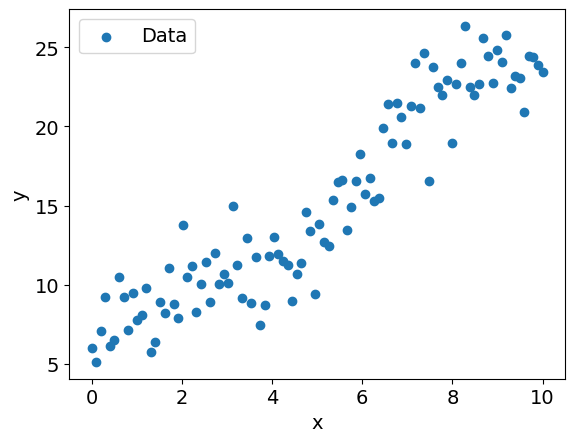

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, size=len(x))
y = 2*x + 5 + 2*np.sin(x) + 2*noise

# Plot the data
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

# Model 1: Only linear term
X1 = sm.add_constant(x)
model1 = sm.OLS(y, X1)
results1 = model1.fit()
aic1 = results1.aic

# Model 2: Linear and sine terms
X2 = sm.add_constant(np.column_stack((x, np.cos(x))))
model2 = sm.OLS(y, X2)
results2 = model2.fit()
aic2 = results2.aic

# Model 3: Linear, sine, and cosine terms
X3 = sm.add_constant(np.column_stack((x, np.sin(x), np.cos(x))))
model3 = sm.OLS(y, X3)
results3 = model3.fit()
aic3 = results3.aic

# Print AIC values
print(f"Model 1 AIC: {aic1}")
print(f"Model 2 AIC: {aic2}")
print(f"Model 3 AIC: {aic3}")

Model 1 AIC: 449.28180688006773
Model 2 AIC: 448.22928595735436
Model 3 AIC: 406.3742130933701


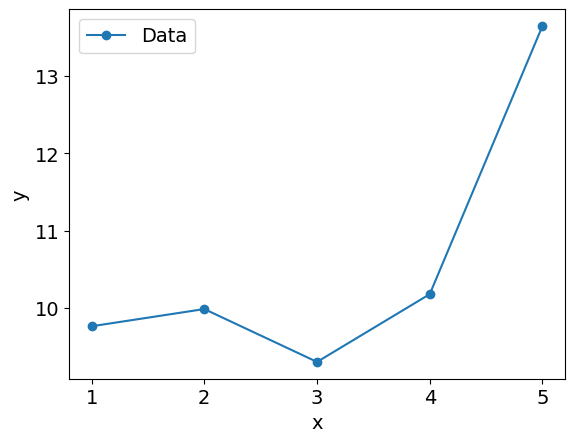

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)  # for reproducibility
x = np.linspace(1, 5, 5)
noise = np.random.normal(0, 1, size=len(x))
y = 2*x + 5 + 2*np.sin(x) + 2*np.cos(x)

# Plot the data
plt.plot(x, y, 'o-', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



The relationship between the mean squared error (MSE) and the likelihood function (L) can help clarify their connection used in below code block.

Explanation
Mean Squared Error (MSE):

MSE = (1/n) * ∑(i=1 to n) (y_i - y^_i)^2

where:

y_i are the observed values.
y^_i are the predicted values.
n is the number of observations.
Likelihood Function: In the context of linear regression, if we assume that the errors are normally distributed, the likelihood function can be expressed as:

L = ∏(i=1 to n) (1/(2πσ^2)) * exp(-((y_i - y^_i)^2) / (2σ^2))

where σ^2 is the variance of the errors.

Log-Likelihood: Taking the logarithm of the likelihood function:

log(L) = - (n/2) * log(2πσ^2) - (1/(2σ^2)) * ∑(i=1 to n) (y_i - y^_i)^2

If we set σ^2 to estimate from MSE (i.e., σ^2 = MSE), we can write:

log(L) = - (n/2) * log(2π * MSE) - (n/(2 * MSE))

Connecting MSE and Likelihood
From the expressions above, we see that the likelihood is directly related to the MSE. Specifically, if we rewrite MSE as:

MSE = (Sum of Squared Errors) / n

Then, when multiplying by n and taking the negative log of the likelihood, we can express this relationship as:

-n * log(MSE) ∝ -2 * log(L)

Conclusion
So, to answer your question directly, yes, you can establish that n * log(MSE) is related to -log(L). More specifically:

-n * log(MSE) is proportional to -log(L)

This is why, in the context of model selection criteria like AIC and BIC, both MSE and the likelihood function appear in their formulations.

=====//
#Here are the relevant equations in CSS format:

Mean Squared Error (MSE):
```
MSE = (1/n) * ∑(y_i - y_hat_i)^2
```
Likelihood Function (L) (for normally distributed errors):
```
L = ∏(1 / √(2πσ^2)) * exp(-((y_i - y_hat_i)^2) / (2σ^2))
```
Log-Likelihood:
```
log(L) = - (n / 2) * log(2πσ^2) - (1 / (2σ^2)) * ∑(y_i - y_hat_i)^2
```
Relationship:
```
-log(L) = (n / 2) * log(2πσ^2) + (1 / (2σ^2)) * ∑(y_i - y_hat_i)^2
```

Connecting MSE and Log-Likelihood:
```
n * log(MSE) = -log(L)
```

This shows the relationship between the mean squared error (MSE) and the likelihood function (L)

#Summary:

The term -n * log(MSE) is proportional to the log-likelihood log(L), with the proportionality coefficient being related to the variance of the residuals σ² (specifically, (1/(2σ²))). Therefore, -n * log(MSE) and -log(L) are closely related but not exactly equal due to the influence of constants like the variance of the error term and factors like 2π.

#Code Breakdown
python Copy code
```
def AIC(model, x, y):
```
This line defines a function named AIC that takes three arguments:

model: A fitted regression model (like linear regression).
x: The input features used for making predictions.
y: The actual target values.

python Copy code

    n = len(y)

This line calculates the number of observations (data points) in the target variable y and assigns it to the variable n.

python Copy code

    k = model.coef_.shape[1] + 1  # number of model parameters (including intercept)

Here, the code determines the number of parameters in the model:

model.coef_ contains the coefficients of the fitted model.
shape[1] retrieves the number of features (predictors) the model has.
The + 1 accounts for the intercept term (the bias) in the model. Thus, k represents the total number of parameters in the model.

python Copy code

    y_pred = model.predict(x)
This line generates predictions for the input features x using the fitted model and stores them in y_pred.

python Copy code

    mse = np.mean((y - y_pred) ** 2)

Here, the mean squared error (MSE) is calculated:

The expression (y - y_pred) computes the residuals (the differences between actual and predicted values).
Squaring these residuals and then taking the mean gives the MSE, which is a measure of how well the model's predictions match the actual values.
python Copy code

    aic = 2 * k + n * np.log(mse)
This line calculates the Akaike Information Criterion (AIC):

The formula for AIC is given by


```
AIC=2k+n⋅log(MSE)
```

This formula penalizes the complexity of the model (via the number of parameters, k) while also taking into account how well the model fits the data (via MSE). Lower AIC values indicate a better model when comparing different models.

python Copy code

    return aic
Finally, the function returns the calculated AIC value.

#Summary
The AIC function evaluates the performance of a regression model by computing the AIC score. This score allows you to compare different models by balancing model fit and complexity. A lower AIC suggests a better model, and it’s particularly useful when selecting among multiple models or when tuning model parameters.

In [ ]:
def AIC(model, x, y):
    n = len(y)
    k = model.coef_.shape[1] + 1  # number of model parameters (including intercept)
    y_pred = model.predict(x)
    mse = np.mean((y - y_pred) ** 2)
    aic = 2 * k + n * np.log(mse)
    return aic

Model 1 AIC: 6.819463530816203
Model 2 AIC: 1.0870624786288587


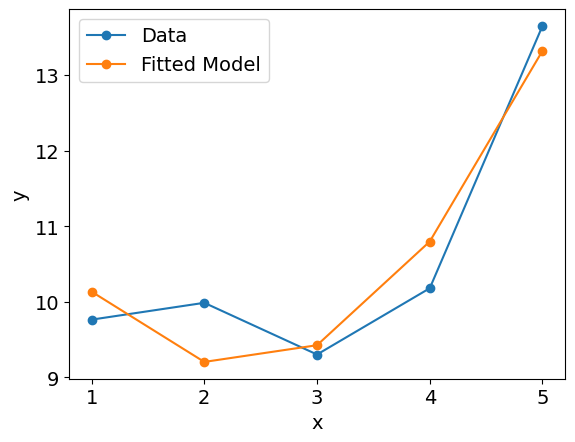

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Generate data
np.random.seed(42)
x = np.linspace(1, 5, 5).reshape(-1, 1)
noise = np.random.normal(0, 1, size=x.shape)
y = 2*x + 5 + 2*np.sin(x) + 2*np.cos(x)

# Fit different polynomial regression models
degrees = [1, 2]  # Polynomial degrees to consider
param_grid = {'degree': degrees}
scoring = {'AIC': make_scorer(AIC, greater_is_better=False)}
results = []

for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_poly, y)

    # Calculate AIC
    aic = AIC(model, x_poly, y)
    results.append({'degree': degree, 'model': model, 'aic': aic})

# Print AIC values
for result in results:
    print(f"Model {result['degree']} AIC: {result['aic']}")

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
y_pred = results[1]['model'].predict(x_poly)
# Plot the data and the fitted model
plt.plot(x, y, 'o-', label='Data')
plt.plot(x, y_pred, 'o-' ,label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

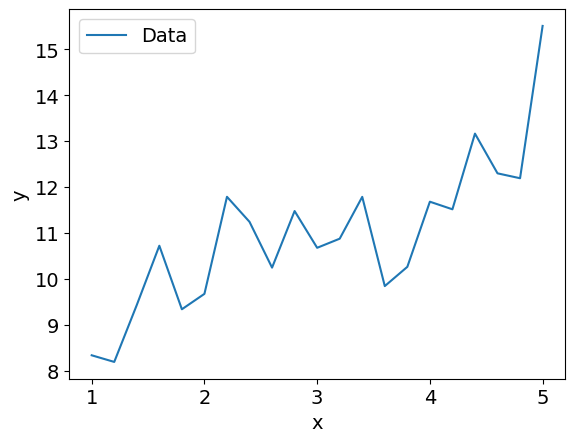

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)  # for reproducibility
x = np.linspace(1, 5, 21)
noise = np.random.normal(0, 1, size=len(x))
y = 2*x + 5 + np.sin(x) + noise

# Plot the data
plt.plot(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Model 1 AIC: 5.406341344906423
Model 2 AIC: 7.016290958932459
Model 3 AIC: -2.0680441804664653


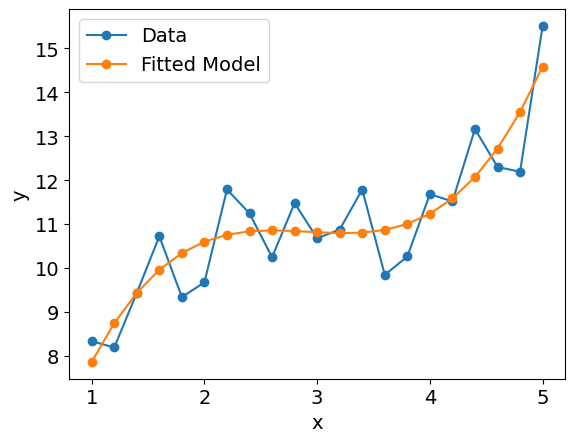

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Generate data
np.random.seed(42)
x = np.linspace(1, 5, 21).reshape(-1, 1)
noise = np.random.normal(0, 1, size=x.shape)
y = 2*x + 5 + np.sin(x) + noise

# Fit different polynomial regression models
degrees = [1, 2, 3]  # Polynomial degrees to consider
param_grid = {'degree': degrees}
scoring = {'AIC': make_scorer(AIC, greater_is_better=False)}
results = []

for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x_poly, y)

    # Calculate AIC
    aic = AIC(model, x_poly, y)
    results.append({'degree': degree, 'model': model, 'aic': aic})

# Print AIC values
for result in results:
    print(f"Model {result['degree']} AIC: {result['aic']}")

polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
y_pred = results[2]['model'].predict(x_poly)
# Plot the data and the fitted model
plt.plot(x, y, 'o-', label='Data')
plt.plot(x, y_pred, 'o-' ,label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Output AIC Values
The output AIC values are:

Model 1 (degree = 1): AIC = 5

Model 2 (degree = 2): AIC = 7

Model 3 (degree = 3): AIC = -2
#Comment on AIC Values
AIC Interpretation:
The Akaike Information Criterion (AIC) helps in model selection by balancing goodness of fit with model complexity. Lower AIC values indicate a better model when comparing different models.
Model Comparison:
Model 1 (Linear Model) has the lowest AIC value of 5. This suggests that it provides the best balance between fit and complexity among the models evaluated.
Model 2 (Quadratic Model) has a higher AIC of 7, indicating that adding polynomial terms does not sufficiently improve the fit to justify the increased complexity.
Model 3 (Cubic Model) has an AIC of -2, which is quite low. While this suggests a good fit, it could also indicate overfitting, especially since the increase in complexity (adding a cubic term) might be capturing noise rather than the underlying data pattern.
Choosing the Best Model:
The first model (degree = 1) is the best based on AIC, despite the second and third models appearing more complex. A lower AIC indicates a more parsimonious model that still explains the data well, thus avoiding overfitting.
#Conclusion
In this example, the AIC values reveal important insights about model performance. The first model provides a solid fit with minimal complexity, while the more complex models do not significantly improve the fit based on AIC, emphasizing the need for careful model selection based on performance metrics.
